In [14]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
#https://www.geeksforgeeks.org/random-forest-regression-in-python/
#https://machinelearningmastery.com/random-forest-ensemble-in-python/
#https://medium.com/@theclickreader/random-forest-regression-explained-with-implementation-in-python-3dad88caf165

In [15]:
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

In [16]:
train_df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/twitter_reddit_time_series_copy2.csv')
train_df = train_df.set_index('date')
#train = train.iloc[20:,:]
train_df

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag
date,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444
...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959


In [17]:
nobs = 31
df_train, df_test = train_df[0:-nobs], train_df[-nobs:]
df_test

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag
date,,,,,,,,,
01/05/2022,1.7979,2.171184,2.880,0.05,155.100579,5.5,65.2,20150.2,22740.959
02/05/2022,11.3230,9.070342,2.810,0.05,155.100579,5.5,65.2,20150.2,22740.959
03/05/2022,-17.5748,7.017218,2.830,0.06,155.100579,5.5,65.2,20275.5,22740.959
04/05/2022,-1.6031,4.326948,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959
05/05/2022,16.8282,3.289849,2.870,0.06,155.100579,5.5,65.2,20275.5,22740.959
06/05/2022,-6.9053,2.312886,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959
07/05/2022,-4.9242,1.637116,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959
08/05/2022,14.0925,2.516328,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959
09/05/2022,28.9857,2.359621,2.750,0.06,155.100579,5.5,65.2,20275.5,22740.959


In [18]:
X_train = df_train.drop(['BEIR'],axis=1)
y_train = df_train['BEIR']
X_test = df_test.drop(['BEIR'],axis=1)
y_test = df_test['BEIR']

In [19]:
df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/final_time_series.csv')
df = df.set_index('date')
df = df[['T10YIE','unemp','int_rate','michigan_sentiment','overall_sentiment_score','overall_attention_score']]
df

,T10YIE,unemp,int_rate,michigan_sentiment,overall_sentiment_score,overall_attention_score
date,,,,,,
12/05/2021,2.540000,5.5,0.06,82.9,26.4459,3.900597
13/05/2021,2.510000,5.5,0.06,82.9,51.3641,2.348224
14/05/2021,2.510000,5.5,0.06,82.9,48.4431,1.156789
15/05/2021,2.521818,5.5,0.06,82.9,17.4456,0.903695
16/05/2021,2.521818,5.5,0.06,82.9,28.1433,0.947890
...,...,...,...,...,...,...
27/05/2022,2.630000,3.4,0.83,58.4,8.4403,2.447695
28/05/2022,2.521818,3.4,0.83,58.4,18.5019,2.114690
29/05/2022,2.521818,3.4,0.83,58.4,24.0466,1.742053


### No HP Optimisation

In [20]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [24]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.196


In [25]:
y_pred

array([2.908, 2.902, 2.904, 2.893, 2.89 , 2.915, 2.899, 2.923, 2.943,
       2.897, 2.898, 2.897, 2.893, 2.879, 2.868, 2.837, 2.839, 2.828,
       2.836, 2.833, 2.859, 2.835, 2.839, 2.82 , 2.815, 2.816, 2.827,
       2.877, 2.82 , 2.831, 2.83 ])

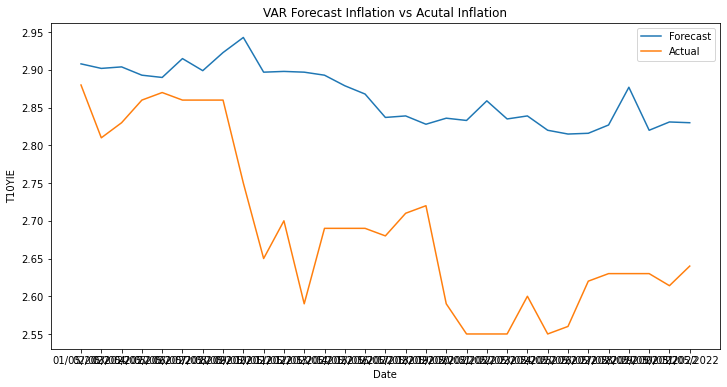

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df_test.index, y_pred, label = "Forecast")
# plotting the line 2 points 
plt.plot(df_test.index, y_test, label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

### Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state = 0)

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]


grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf_grid = GridSearchCV(estimator = rf, param_grid = grid, cv = 5, n_jobs = -1)

rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, 120],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20]})

In [28]:
# this prints the contents of the parameters in the random grid
print ('Random grid: ', grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_grid.best_params_, ' \n')

Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2}  



In [45]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
tree = RandomForestRegressor(random_state = 0,
                             n_estimators = rf_grid.best_params_['n_estimators'], 
                             max_features = rf_grid.best_params_['max_features'],
                             max_depth= rf_grid.best_params_['max_depth'],
                             min_samples_split= rf_grid.best_params_['min_samples_split'],
                             min_samples_leaf= rf_grid.best_params_['min_samples_leaf'],
                             bootstrap= rf_grid.best_params_['bootstrap'],)
tree.fit(X_train,y_train)
#5 Predicting a new result
y_pred = tree.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.195


In [46]:
error = (rmse/np.mean(y_test))*100
error
#We see that the RMSE is quite low compared to the mean (7.2% of the size of the mean overall), 
#which means that XGBoost did quite a good job at predicting the values of the test set. 

7.246984918598798

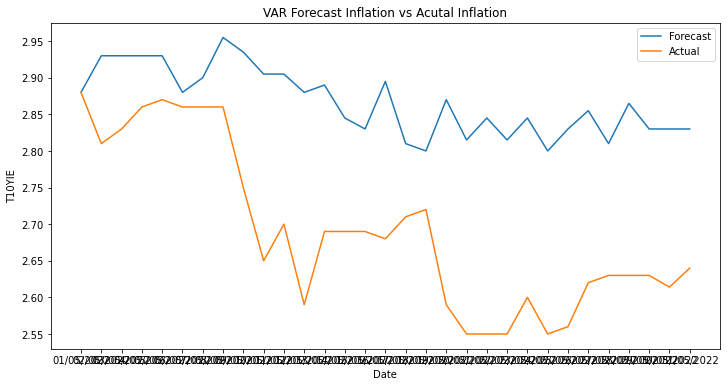

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df_test.index, y_pred, label = "Forecast")
# plotting the line 2 points 
plt.plot(df_test.index, y_test, label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [52]:
n_estimators
max_features

['auto', 'sqrt']

### Random Search

In [31]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=9; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=8; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=11; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=11; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=12; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=7; total t

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19,
                                                         20]},
                   random_state=35, verbose=2)

In [32]:
# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 2, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True}  



In [47]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
tree = RandomForestRegressor(random_state = 0,
                             n_estimators = rf_grid.best_params_['n_estimators'], 
                             max_features = rf_grid.best_params_['max_features'],
                             max_depth= rf_grid.best_params_['max_depth'],
                             min_samples_split= rf_grid.best_params_['min_samples_split'],
                             min_samples_leaf= rf_grid.best_params_['min_samples_leaf'],
                             bootstrap= rf_grid.best_params_['bootstrap'],)
tree.fit(X_train,y_train)
#5 Predicting a new result
ry_pred = tree.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.195


In [48]:
error = (rmse/np.mean(y_test))*100
error
#We see that the RMSE is quite low compared to the mean (7.2% of the size of the mean overall), 
#which means that XGBoost did quite a good job at predicting the values of the test set. 

7.246984918598798


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=16; total time=   0.1s
[CV] END bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=8; total time=   0.1s
[CV] END bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=8; total time=   0.1s
[CV] END bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=8; total time=   0.0s
[CV] END bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=8; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_fe

[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=9; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=8; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=8; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=11; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=11; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=12; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features


[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1; total time=   0.1s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=15; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=12; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=12; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=12; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=12; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=12; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=12; total time=   0.1s
[CV] END bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=8; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=

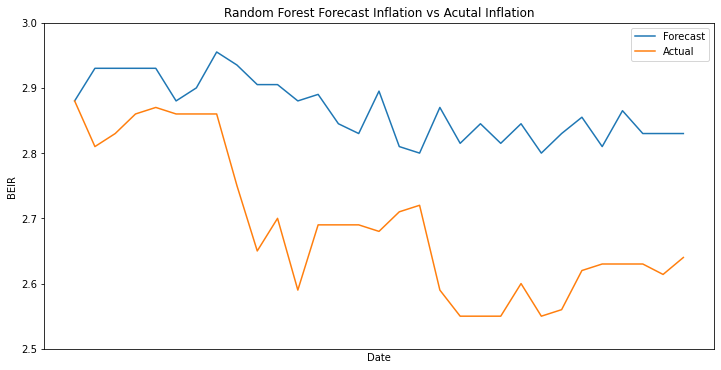

In [66]:
plt.figure(figsize=(12,6))
plt.plot(df_test.index, y_pred, label = "Forecast")
# plotting the line 2 points 
plt.plot(df_test.index, y_test, label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('BEIR')
# Set a title of the current axes.
plt.title('Random Forest Forecast Inflation vs Acutal Inflation')
# show a legend on the plot
plt.legend()
plt.ylim(2.5,3)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
# Display a figure.
plt.savefig("rf_forecast.png")
plt.show()

In [65]:
#https://medium.com/@anthonycarlleston/visualizing-the-decisiontrees-in-randomforestregressor-in-a-pipeline-with-python-f5519f80e3f8

In [37]:
X_train

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag
date,,,,,,,,
01/06/2021,26.4459,3.900597,0.05,99.875276,11.2,82.9,17915.4,19477.444
02/06/2021,51.3641,2.348224,0.06,99.875276,11.2,82.9,17915.4,19477.444
03/06/2021,48.4431,1.156789,0.06,99.875276,11.2,82.9,17915.4,19477.444
04/06/2021,17.4456,0.903695,0.06,99.875276,11.2,82.9,17915.4,19477.444
05/06/2021,28.1433,0.947890,0.07,99.875276,11.2,82.9,17915.4,19477.444
...,...,...,...,...,...,...,...,...
26/04/2022,27.5878,2.004162,0.07,145.041207,5.7,65.2,20150.2,22740.959
27/04/2022,21.1544,1.617477,0.07,145.041207,5.7,65.2,20150.2,22740.959
28/04/2022,17.5450,1.453405,0.07,145.041207,5.7,65.2,20150.2,22740.959


### Visualising Trees

In [38]:
#https://medium.com/@anthonycarlleston/visualizing-the-decisiontrees-in-randomforestregressor-in-a-pipeline-with-python-f5519f80e3f8

In [39]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [40]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', model)
        ])

# Fitting the Random Forest Regression model to the data
pipe.fit(X_train, y_train)
ypipe=pipe.predict(X_test)

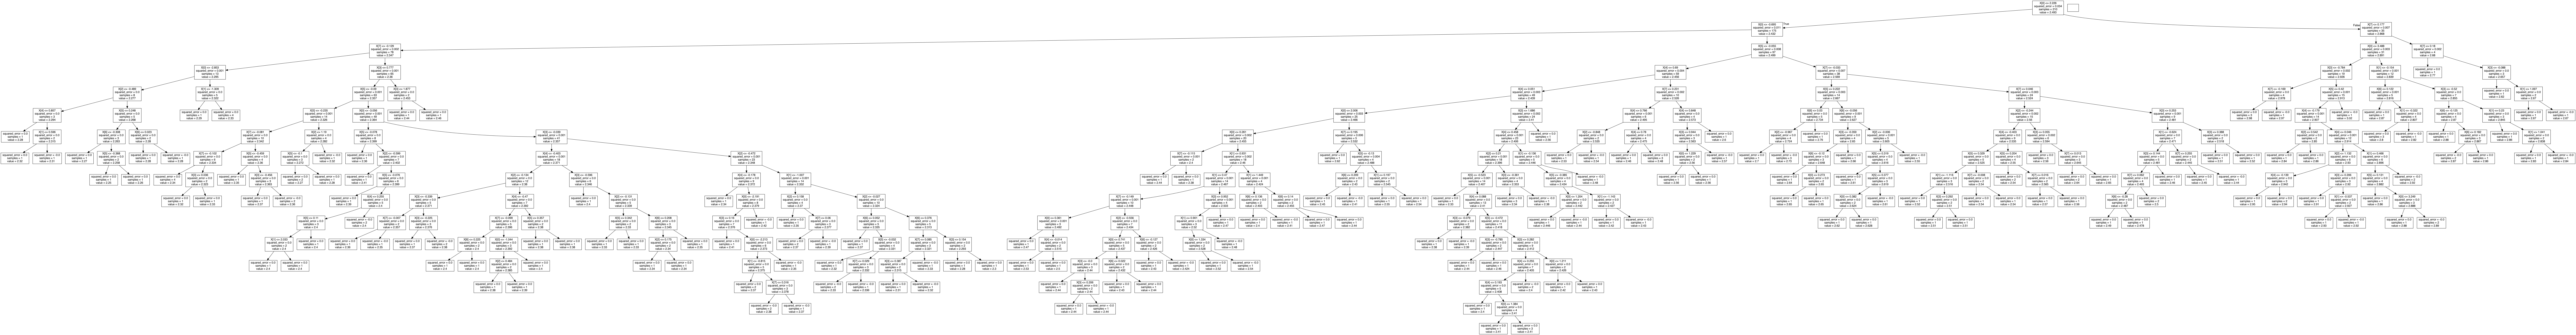

In [41]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(pipe.named_steps['regressor'].estimators_[0], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [42]:
#https://mljar.com/blog/visualize-tree-from-random-forest/
#https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

### Feature Importance

In [43]:
#https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


Feature: 0, Score: 0.01462
Feature: 1, Score: 0.01990
Feature: 2, Score: 0.00457
Feature: 3, Score: 0.10663
Feature: 4, Score: 0.43192
Feature: 5, Score: 0.01544
Feature: 6, Score: 0.40624
Feature: 7, Score: 0.00067


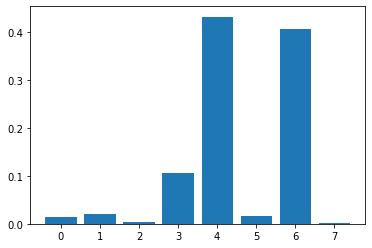

In [55]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [56]:
X_train.columns

Index(['overall_sentiment_score_20d_lag', 'overall_attention_score_20d_lag',
       'interest_rate_1yr_lag', 'commodities_1yr_lag', 'UNRATENSA_1yr_lag',
       'UMCSENT_2wk_lag', 'WM2NS_1yr_lag', 'gdp_1yr_lag'],
      dtype='object')